In [1]:
import pandas as pd
import numpy as np

pib_per_habitant =pd.read_csv("PIB_par_habitant.csv",skiprows=4)
pib_per_habitant.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1510.742951,1567.635839,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690,NaN


In [2]:
pib_per_habitant = pib_per_habitant.drop(columns=['Unnamed: 69'],errors='ignore')

In [3]:
pib_per_habitant = pib_per_habitant.melt(
    id_vars=["Country Name","Country Code","Indicator Name","Indicator Code"],
    var_name = 'year',
    value_name= 'GDP per Capita'
             )

In [4]:
pib_per_habitant.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP per Capita
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,186.121835
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,121.939925
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,NaN


In [5]:
pib_per_habitant['year']=pd.to_numeric(pib_per_habitant['year'], errors='coerce')

In [6]:
pib_per_habitant.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
year                 0
GDP per Capita    2749
dtype: int64

In [7]:
pib_per_habitant.shape

(17290, 6)

In [8]:
pib_per_habitant =pib_per_habitant.dropna(subset=['year', 'GDP per Capita'])


In [9]:
pib_per_habitant.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
year              0
GDP per Capita    0
dtype: int64

In [10]:
pib_per_habitant.shape


(14541, 6)

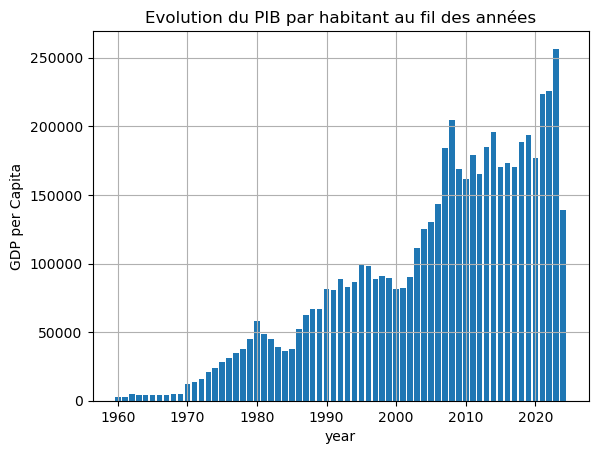

In [11]:
import matplotlib.pyplot as plt
plt.bar(pib_per_habitant['year'],pib_per_habitant['GDP per Capita'])
plt.xlabel('year')
plt.ylabel('GDP per Capita')
plt.title('Evolution du PIB par habitant au fil des années')
plt.grid(True)
plt.show()

In [12]:
unemployement_rate = pd.read_csv('Unemployment_rate.csv',skiprows=4)

In [13]:
unemployement_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000,NaN


In [14]:
unemployement_rate = unemployement_rate.drop(columns='Unnamed: 69',errors='ignore')

In [15]:
unemployement_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.036357,7.194666,7.346331,7.360513,7.584419,8.191395,8.577385,7.985202,7.806365,7.772654
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.052000,10.133000,11.184000,11.196000,11.185000,11.710000,11.994000,14.100000,13.991000,13.295000
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.164467,4.157574,4.274196,4.323631,4.395271,4.852393,4.736732,3.658573,3.277245,3.218313
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.490000,16.575000,16.610000,16.594000,16.497000,16.690000,15.799000,14.602000,14.537000,14.464000


In [16]:
unemployement_rate = unemployement_rate.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
    var_name='year',
    value_name='Unemployment,total'
)


In [17]:
print(unemployement_rate.columns)


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'year', 'Unemployment,total'],
      dtype='object')


In [18]:
unemployement_rate.head()


,Country Name,Country Code,Indicator Name,Indicator Code,year,"Unemployment,total"
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1960,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1960,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1960,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1960,NaN


In [19]:
unemployement_rate.isnull().sum()

Country Name             0
Country Code             0
Indicator Name           0
Indicator Code           0
year                     0
Unemployment,total    9309
dtype: int64

In [20]:
unemployement_rate.shape

(17290, 6)

In [21]:
unemployement_rate['year']= pd.to_numeric(unemployement_rate['year'],errors = 'coerce')

In [22]:
unemployement_rate= unemployement_rate.dropna()

In [23]:
unemployement_rate.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
year                  0
Unemployment,total    0
dtype: int64

In [24]:
unemployement_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,"Unemployment,total"
8247,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,8.179629
8248,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,8.070000
8249,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,4.158680
8250,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,16.855000
8251,Albania,ALB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,10.304000


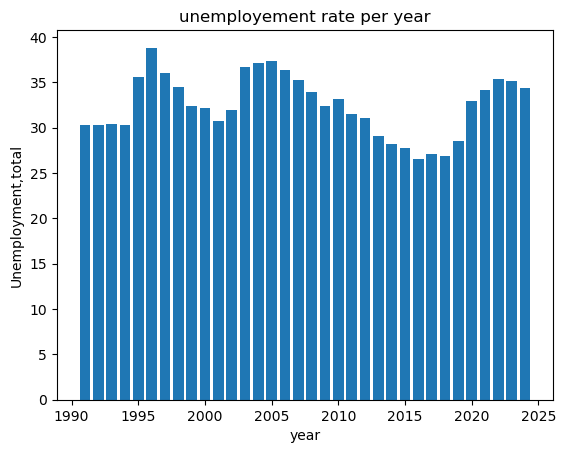

In [25]:
plt.bar(unemployement_rate['year'],unemployement_rate['Unemployment,total'])
plt.xlabel("year")
plt.ylabel('Unemployment,total')
plt.title('unemployement rate per year')
plt.show()

In [26]:
pop_tot = pd.read_csv('Population_total.csv',skiprows = 4)
pop_tot.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [27]:
pop_tot=pop_tot.drop(columns='Unnamed: 69',errors='ignore')

In [28]:
pop_tot=pop_tot.melt(
    id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'] ,
    var_name = 'year',
    value_name = 'Population, total'
)

In [29]:
pop_tot.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,"Population, total"
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130075728.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0


In [30]:
pop_tot['year']= pd.to_numeric(pop_tot['year'],errors ='coerce')

In [31]:
pop_tot.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
year                  0
Population, total    95
dtype: int64

In [32]:
pop_tot = pop_tot.dropna()

In [33]:
pop_tot.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
year                 0
Population, total    0
dtype: int64

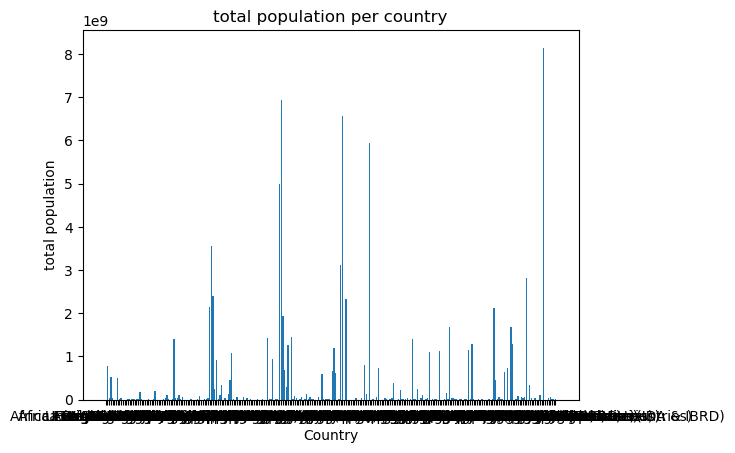

In [34]:
plt.bar(pop_tot['Country Name'],pop_tot['Population, total'])
plt.xlabel('Country')
plt.ylabel('total population')
plt.title('total population per country')
plt.show()

In [35]:
school_en=pd.read_csv('School enrollment.csv',skiprows=4)
school_en.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,137.829788,139.320587,135.124725,123.625908,131.802170,NaN,124.379367,NaN
1,Africa Eastern and Southern,AFE,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,42.681499,43.254089,43.559410,44.128731,44.682560,45.150532,45.281620,45.155392,45.606079,NaN
2,Afghanistan,AFG,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,53.435040,55.536430,57.357849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,42.306179,42.433170,42.714561,43.906269,44.734341,45.567429,45.637299,46.442242,46.300491,NaN
4,Angola,AGO,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,54.416799,NaN,NaN,NaN,NaN,53.135154,NaN,51.483905,NaN,NaN


In [36]:
school_en=school_en.drop(columns='Unnamed: 69')
school_en.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,137.829788,139.320587,135.124725,123.625908,131.802170,NaN,124.379367
1,Africa Eastern and Southern,AFE,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,42.261860,42.681499,43.254089,43.559410,44.128731,44.682560,45.150532,45.281620,45.155392,45.606079
2,Afghanistan,AFG,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,53.150108,53.435040,55.536430,57.357849,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,43.708931,42.306179,42.433170,42.714561,43.906269,44.734341,45.567429,45.637299,46.442242,46.300491
4,Angola,AGO,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,54.416799,NaN,NaN,NaN,NaN,53.135154,NaN,51.483905,NaN


In [37]:
school_en=school_en.melt(
    id_vars = ['Country Name','Country Code','Indicator Name','Indicator Code'],
    var_name = 'year',
    value_name = 'School enrollment'
)

In [38]:
school_en.isnull().sum()

Country Name            0
Country Code            0
Indicator Name          0
Indicator Code          0
year                    0
School enrollment    9407
dtype: int64

In [39]:
school_en=school_en.dropna()

In [40]:
school_en.isnull().sum()

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
year                 0
School enrollment    0
dtype: int64

In [41]:
indic_uemp= pd.read_csv('indic_unemp.csv')
indic_uemp.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [42]:
indic_uemp = indic_uemp.drop(columns='Unnamed: 5')

In [43]:
indic_uemp.isnull().sum()

Country Code      0
Region           48
IncomeGroup      50
SpecialNotes    135
TableName         0
dtype: int64

In [44]:
indic_uemp.shape

(265, 5)

In [45]:
indic_uemp=indic_uemp.dropna(subset=['Region'])

In [46]:
indic_uemp.shape

(217, 5)

In [47]:
indic_uemp.isnull().sum()

Country Code      0
Region            0
IncomeGroup       2
SpecialNotes    127
TableName         0
dtype: int64

In [48]:
indic_uemp[indic_uemp['IncomeGroup'].isnull()]

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
72,ETH,Sub-Saharan Africa,NaN,The reporting period for national accounts dat...,Ethiopia
253,VEN,Latin America & Caribbean,NaN,NaN,"Venezuela, RB"


In [49]:
indic_uemp.loc[indic_uemp['Country Code']=='ETH','IncomeGroup']='Low income'
indic_uemp.loc[indic_uemp['Country Code']=='VEN','IncomeGroup']='Upper middle income'


In [50]:
indic_uemp.isnull().sum()

Country Code      0
Region            0
IncomeGroup       0
SpecialNotes    127
TableName         0
dtype: int64

In [51]:
pib_per_habitant = pd.merge(indic_uemp,pib_per_habitant,  on=['Country Code'], how='inner')


In [52]:
pib_per_habitant.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,year,GDP per Capita
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,1986,6767.559229
1,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,1987,8244.045660
2,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,1988,10056.261393
3,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,1989,11507.217151
4,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,GDP per capita (current US$),NY.GDP.PCAP.CD,1990,12187.536361


In [53]:
pib_per_habitant.shape

(11549, 10)

In [54]:
unemployement_rate = pd.merge(indic_uemp,unemployement_rate ,on=['Country Code'],how='inner')

In [55]:
unemployement_rate.head()


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,year,"Unemployment,total"
0,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991,8.070
1,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1992,8.011
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1993,7.888
3,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1994,7.822
4,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1995,7.817


In [56]:
school_en= pd.merge(indic_uemp,school_en,on='Country Code',how='inner')
school_en.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,year,School enrollment
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2001,97.556534
1,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2002,100.163063
2,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2003,101.929070
3,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2004,100.940941
4,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"School enrollment, secondary (% gross)",SE.SEC.ENRR,2005,99.205353


In [57]:
pop_tot= pd.merge(indic_uemp,pop_tot,on='Country Code',how='inner')
pop_tot.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,Indicator Name,Indicator Code,year,"Population, total"
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"Population, total",SP.POP.TOTL,1960,54922.0
1,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"Population, total",SP.POP.TOTL,1961,55578.0
2,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"Population, total",SP.POP.TOTL,1962,56320.0
3,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"Population, total",SP.POP.TOTL,1963,57002.0
4,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,"Population, total",SP.POP.TOTL,1964,57619.0


In [58]:
pop_tot.shape

(14075, 10)

In [59]:
pop_tot = pop_tot.drop(columns=['Indicator Name','Indicator Code'])
school_en = school_en.drop(columns=['Indicator Name','Indicator Code'])
unemployement_rate = unemployement_rate.drop(columns=['Indicator Name','Indicator Code'])
pib_per_habitant = pib_per_habitant.drop(columns=['Indicator Name','Indicator Code'])


In [60]:
pop_tot.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,year,"Population, total"
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,1960,54922.0
1,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,1961,55578.0
2,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,1962,56320.0
3,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,1963,57002.0
4,ABW,Latin America & Caribbean,High income,NaN,Aruba,Aruba,1964,57619.0


In [61]:
print("Unemployment :", unemployement_rate.shape)
print("GDP :", pib_per_habitant.shape)
print("Education :", school_en.shape)
print("Population :", pop_tot.shape)


Unemployment : (6349, 8)
GDP : (11549, 8)
Education : (5801, 8)
Population : (14075, 8)


In [62]:
print(unemployement_rate['year'].min(), unemployement_rate['year'].max())
print(pib_per_habitant['year'].min(), pib_per_habitant['year'].max())
print(school_en['year'].min(), school_en['year'].max())
print(pop_tot['year'].min(), pop_tot['year'].max())


1991 2024
1960 2024
1970 2024
1960 2024


In [63]:
common_countries = set(unemployement_rate['Country Code']).intersection(pib_per_habitant['Country Code'], school_en['Country Code'], pop_tot['Country Code'])
print("Pays communs :", len(common_countries))


Pays communs : 183


In [64]:
unemployement_rate['year']=unemployement_rate['year'].astype(int)
pib_per_habitant['year'] = pib_per_habitant['year'].astype(int)
school_en['year'] = school_en['year'].astype(int)
pop_tot['year'] = pop_tot['year'].astype(int)

In [65]:
unemployement_rate= unemployement_rate[(unemployement_rate['year'] >= 1991)]
pib_final = pib_per_habitant[(pib_per_habitant['year'] >= 1991)]
school_enroll = school_en[(school_en['year'] >= 1991)]
pop_tot = pop_tot[(pop_tot['year'] >= 1991)]

In [66]:
countries_common = list(common_countries)

unemployement_rate = unemployement_rate[unemployement_rate['Country Code'].isin(countries_common)]
pib_final = pib_final[pib_final['Country Code'].isin(countries_common)]
school_enroll = school_enroll[school_enroll['Country Code'].isin(countries_common)]
pop_tot = pop_tot[pop_tot['Country Code'].isin(countries_common)]


In [67]:
print(unemployement_rate.shape)
print(pib_per_habitant.shape)
print(school_enroll.shape)
print(pop_tot.shape)


(6213, 8)
(11549, 8)
(3765, 8)
(6222, 8)


In [68]:
pop_tot.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,year,"Population, total"
96,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,1991,12238879.0
97,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,1992,13278974.0
98,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,1993,14943172.0
99,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,1994,16250794.0
100,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,1995,17065836.0


In [69]:
merged = unemployement_rate.merge(pib_final, on=['Country Code', 'year','Region','IncomeGroup','SpecialNotes','TableName','Country Name'], how='inner')
merged = merged.merge(school_enroll, on=['Country Code', 'year','Region','IncomeGroup','SpecialNotes','TableName','Country Name'], how='inner')
merged = merged.merge(pop_tot, on=['Country Code', 'year','Region','IncomeGroup','SpecialNotes','TableName','Country Name'], how='inner')


In [70]:
merged.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Country Name,year,"Unemployment,total",GDP per Capita,School enrollment,"Population, total"
0,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,2001,7.953,138.706822,14.04041,20284307.0
1,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,2003,7.880,198.871116,13.95953,22733049.0
2,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,2004,7.899,221.763654,19.21438,23560654.0
3,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,2005,7.885,254.184249,20.27351,24404567.0
4,AFG,Middle East & North Africa,Low income,The reporting period for national accounts dat...,Afghanistan,Afghanistan,2006,7.914,274.218554,29.52389,25424094.0


In [71]:
merged.isnull().sum()

Country Code             0
Region                   0
IncomeGroup              0
SpecialNotes          1951
TableName                0
Country Name             0
year                     0
Unemployment,total       0
GDP per Capita           0
School enrollment        0
Population, total        0
dtype: int64

In [72]:
merged.shape

(3732, 11)

In [73]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Code        3732 non-null   object 
 1   Region              3732 non-null   object 
 2   IncomeGroup         3732 non-null   object 
 3   SpecialNotes        1781 non-null   object 
 4   TableName           3732 non-null   object 
 5   Country Name        3732 non-null   object 
 6   year                3732 non-null   int64  
 7   Unemployment,total  3732 non-null   float64
 8   GDP per Capita      3732 non-null   float64
 9   School enrollment   3732 non-null   float64
 10  Population, total   3732 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 320.8+ KB


In [74]:
merged.describe()

,year,"Unemployment,total",GDP per Capita,School enrollment,"Population, total"
count,3732.000000,3732.000000,3732.000000,3732.000000,3.732000e+03
mean,2009.233119,7.764840,12821.374935,76.988246,3.911192e+07
std,8.755948,5.867644,19229.002040,30.869584,1.414094e+08
min,1991.000000,0.100000,51.240897,3.347850,1.013230e+05
25%,2003.000000,3.617500,1251.606504,54.077676,2.747919e+06
50%,2010.000000,6.029500,4196.795035,85.350859,9.046276e+06
75%,2016.000000,10.417750,15619.604011,99.109015,2.723778e+07
max,2024.000000,37.320000,134965.815442,164.079819,1.450936e+09


In [75]:
merged.nunique()

Country Code           181
Region                   7
IncomeGroup              4
SpecialNotes            70
TableName              181
Country Name           181
year                    34
Unemployment,total    3209
GDP per Capita        3732
School enrollment     3732
Population, total     3732
dtype: int64

<Axes: title={'center': 'taux de chomage mondial par continent'}, xlabel='Region', ylabel='Unemployment rate'>

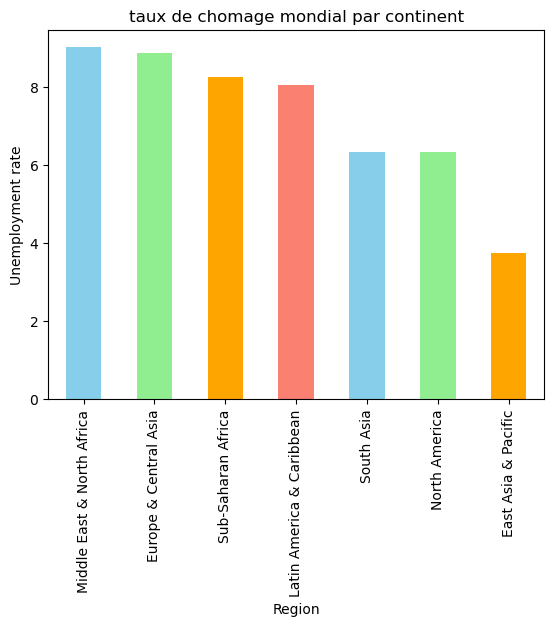

In [76]:
merged.groupby('Region')['Unemployment,total'].mean().sort_values(ascending=False).plot(
    kind='bar',
    xlabel = 'Region',
    ylabel='Unemployment rate',
    title= 'taux de chomage mondial par continent',
    color = ['skyblue', 'lightgreen', 'orange', 'salmon']
)

<Axes: title={'center': 'Taux de chômage moyen par niveau de revenu'}, xlabel='Niveau de revenu', ylabel='Taux de chômage (%)'>

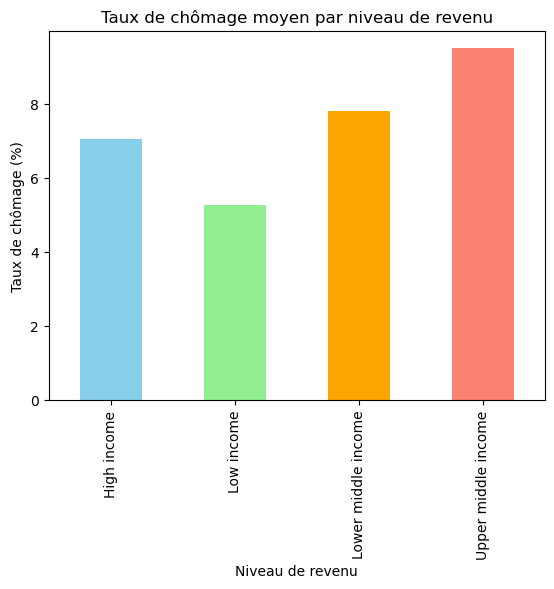

In [77]:
merged.groupby('IncomeGroup')['Unemployment,total'].mean().plot( kind='bar', 
    title='Taux de chômage moyen par niveau de revenu',
    ylabel='Taux de chômage (%)',
    xlabel='Niveau de revenu',
    color=['skyblue', 'lightgreen', 'orange', 'salmon'])

<Axes: title={'center': 'Taux de chômage mondial au fil du temps'}, xlabel='year'>

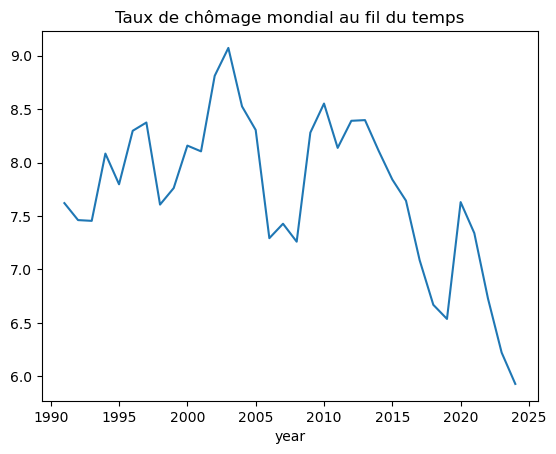

In [78]:
merged.groupby('year')['Unemployment,total'].mean().plot(title="Taux de chômage mondial au fil du temps")


In [79]:
correlation=merged[['Unemployment,total','GDP per Capita','School enrollment','Population, total']].corr()

<Axes: >

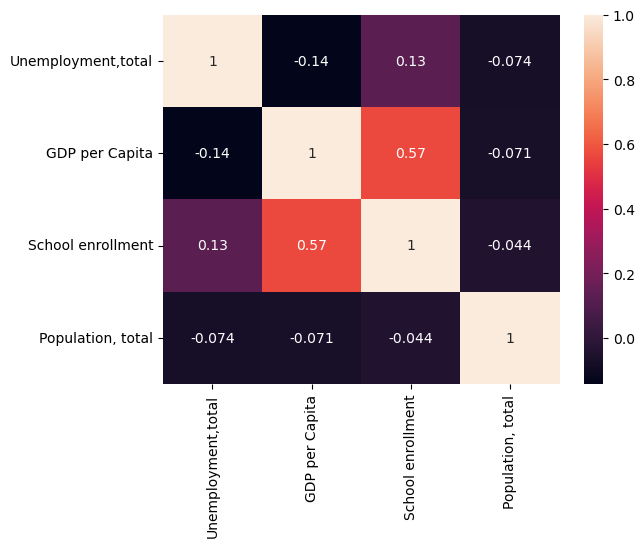

In [80]:
import seaborn as sns
sns.heatmap(correlation , annot = True)
# la correlation entre le taux de chomage et les d'autres var est proche de 0 alors il ya aucune relation lineaire entre le taux de chomage et les autres variables

<Axes: xlabel='GDP per Capita', ylabel='Unemployment,total'>

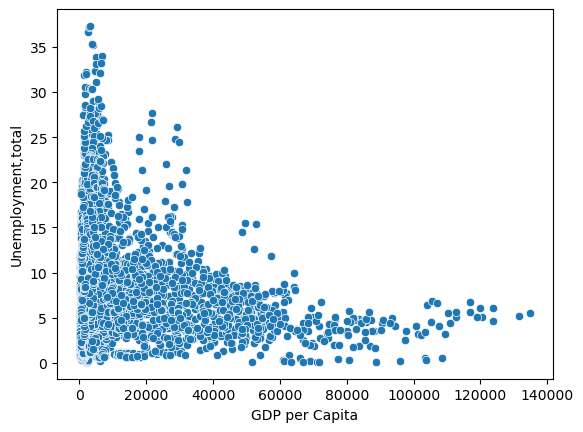

In [81]:
sns.scatterplot(data=merged, x='GDP per Capita', y='Unemployment,total')


<Axes: xlabel='School enrollment', ylabel='Unemployment,total'>

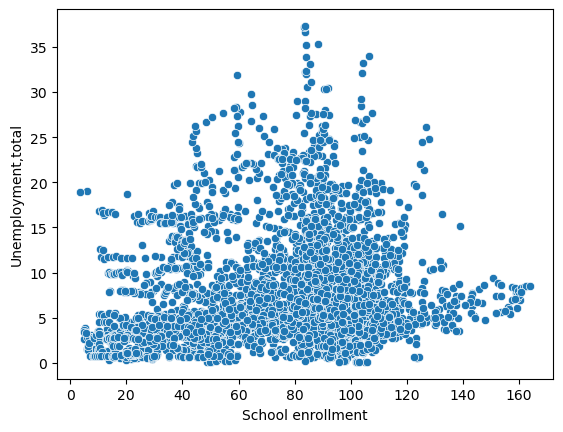

In [82]:
sns.scatterplot(data=merged,x='School enrollment',y='Unemployment,total')

<Axes: xlabel='Population, total', ylabel='Unemployment,total'>

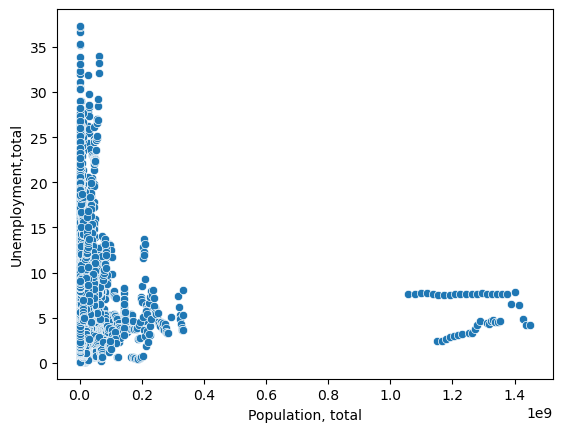

In [83]:
sns.scatterplot(data=merged,x='Population, total',y='Unemployment,total')

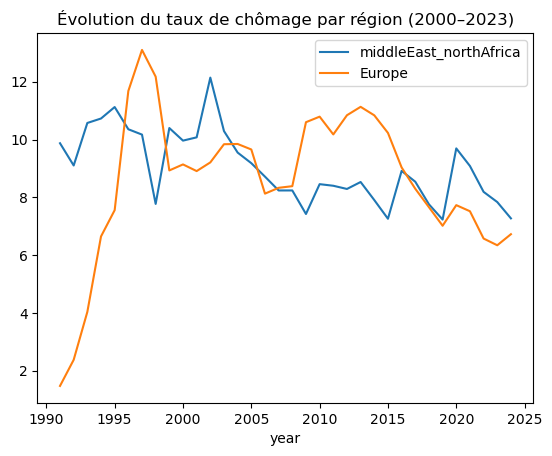

In [84]:
middleEast_northAfrica= merged[merged['Region']=='Middle East & North Africa']
middleEast_northAfrica.groupby('year')['Unemployment,total'].mean().plot(label='middleEast_northAfrica')

europe = merged[merged['Region']=='Europe & Central Asia']
europe.groupby('year')['Unemployment,total'].mean().plot(label='Europe')

plt.legend()
plt.title("Évolution du taux de chômage par région (2000–2023)")
plt.show()

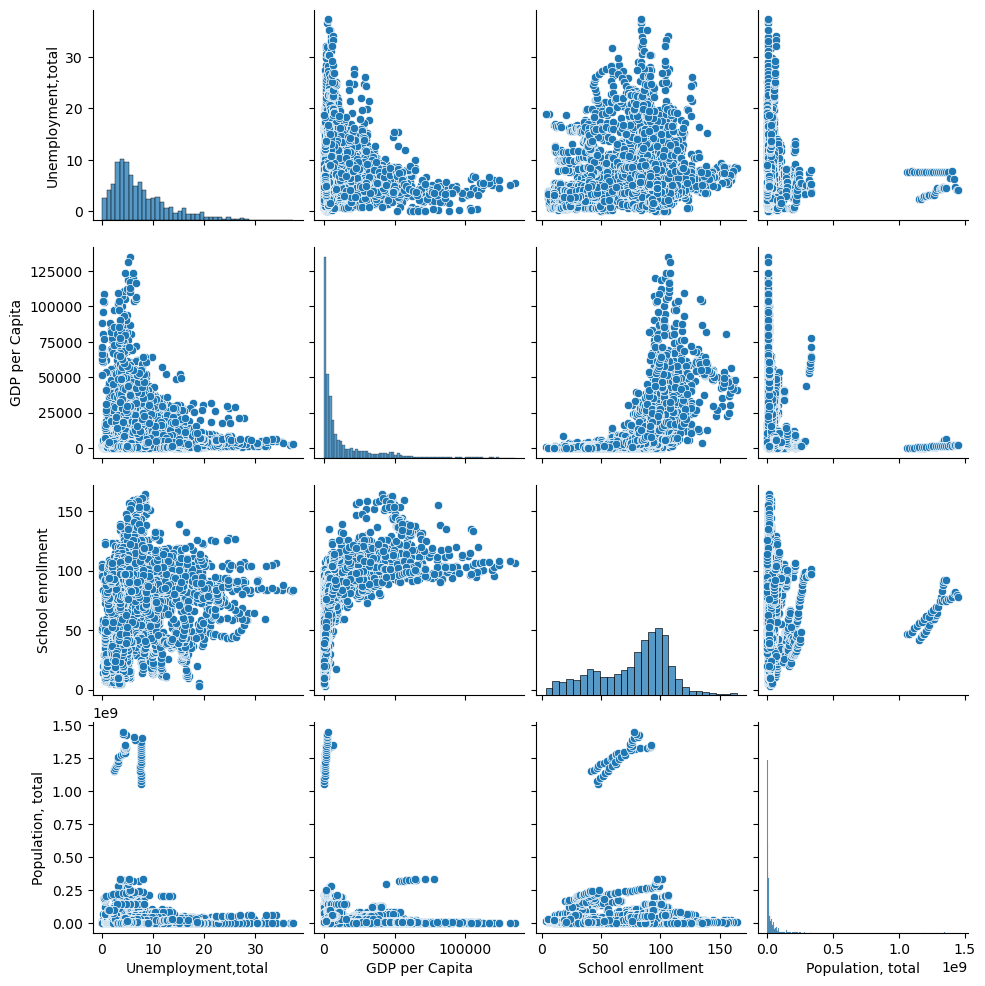

In [85]:
import seaborn as sns
sns.pairplot(merged, vars=['Unemployment,total', 'GDP per Capita', 'School enrollment', 'Population, total'])


In [86]:
merged.groupby('IncomeGroup')[['Unemployment,total', 'GDP per Capita']].corr()


Unemployment,total  GDP per Capita
IncomeGroup                                                               
High income         Unemployment,total            1.000000       -0.361794
                    GDP per Capita               -0.361794        1.000000
Low income          Unemployment,total            1.000000        0.406764
                    GDP per Capita                0.406764        1.000000
Lower middle income Unemployment,total            1.000000        0.300027
                    GDP per Capita                0.300027        1.000000
Upper middle income Unemployment,total            1.000000        0.002486
                    GDP per Capita                0.002486        1.000000

In [87]:
import statsmodels.api as sm
X = merged[['GDP per Capita', 'School enrollment', 'Population, total']]
y = merged['Unemployment,total']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Unemployment,total   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.68e-76
Time:                        19:00:57   Log-Likelihood:                -11722.
No. Observations:                3732   AIC:                         2.345e+04
Df Residuals:                    3728   BIC:                         2.348e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7083      0.26

In [88]:
merged[[ 'GDP per Capita', 'School enrollment', 'Population, total']].corr()


,GDP per Capita,School enrollment,"Population, total"
GDP per Capita,1.000000,0.566893,-0.070637
School enrollment,0.566893,1.000000,-0.044154
"Population, total",-0.070637,-0.044154,1.000000


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = merged[['GDP per Capita', 'School enrollment', 'Population, total','Unemployment,total']].dropna()
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


             Variable       VIF
0      GDP per Capita  2.196174
1   School enrollment  4.748457
2   Population, total  1.069606
3  Unemployment,total  2.783237


In [90]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

X = merged[['GDP per Capita', 'School enrollment', 'Population, total']].dropna()
y = merged.loc[X.index, 'Unemployment,total']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = sm.add_constant(X_scaled)
model = sm.OLS(y, X_scaled).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Unemployment,total   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           3.68e-76
Time:                        19:00:58   Log-Likelihood:                -11722.
No. Observations:                3732   AIC:                         2.345e+04
Df Residuals:                    3728   BIC:                         2.348e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7648      0.092     84.725      0.0

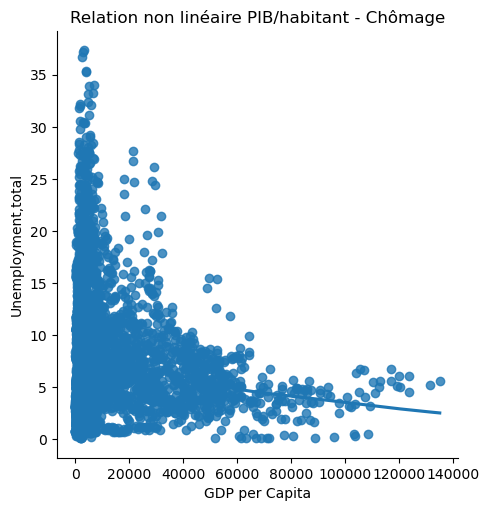

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='GDP per Capita', y='Unemployment,total', data=merged, lowess=True)
plt.title("Relation non linéaire PIB/habitant - Chômage")
plt.show()


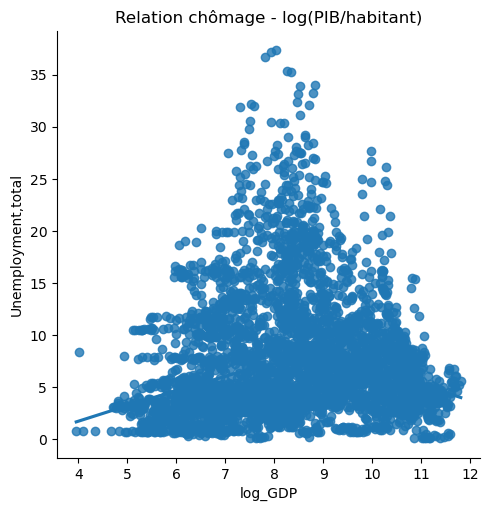

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

merged['log_GDP'] = np.log(merged['GDP per Capita'] + 1)  # éviter log(0)

sns.lmplot(x='log_GDP', y='Unemployment,total', data=merged, lowess=True)
plt.title("Relation chômage - log(PIB/habitant)")
plt.show()


In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged[['GDP per Capita']]
y = merged['Unemployment,total']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

print("R² :", r2_score(y, y_pred))


R² : 0.021958528219344298


In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

X = merged[['log_GDP']]
y = merged['Unemployment,total']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

print("R² (polynomial):", r2_score(y, y_pred))


R² (polynomial): 0.10428301943713247


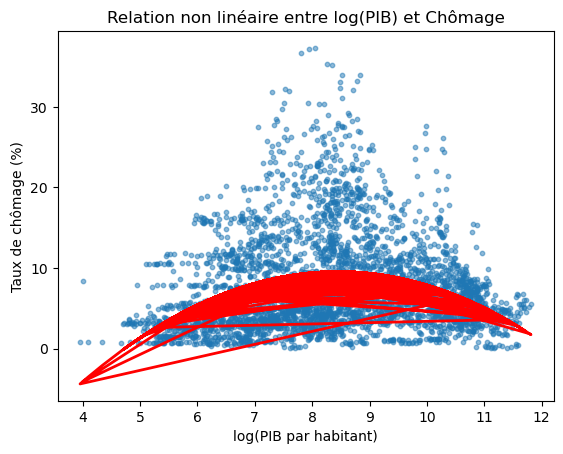

In [95]:
import matplotlib.pyplot as plt

plt.scatter(merged['log_GDP'], y, s=10, alpha=0.5)
plt.plot(merged['log_GDP'], y_pred, color='red', linewidth=2)
plt.title("Relation non linéaire entre log(PIB) et Chômage")
plt.xlabel("log(PIB par habitant)")
plt.ylabel("Taux de chômage (%)")
plt.show()


In [96]:
print("min",merged['Unemployment,total'].mean())
print("max",merged['Unemployment,total'].mean().max())


min 7.76484030010718
max 7.76484030010718


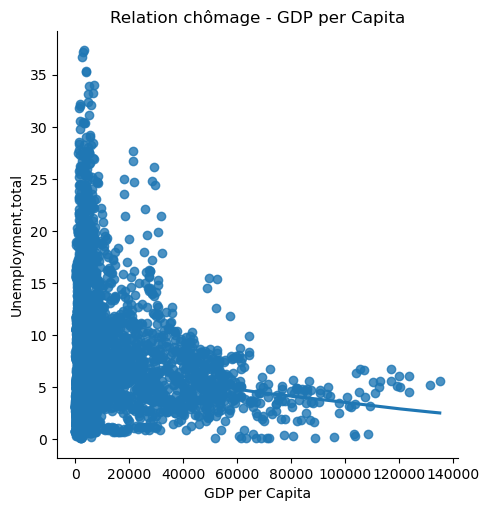

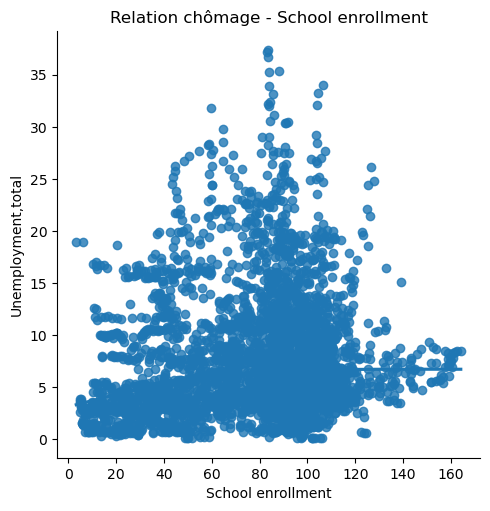

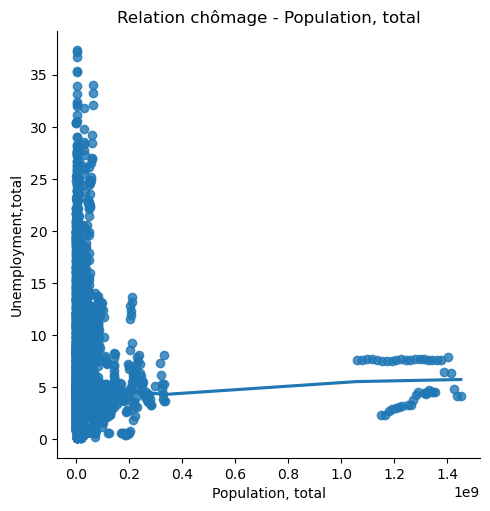

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['GDP per Capita', 'School enrollment', 'Population, total']

for var in variables:
    sns.lmplot(x=var, y='Unemployment,total', data=merged, lowess=True)
    plt.title(f"Relation chômage - {var}")
    plt.show()


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

X_vars = ['GDP per Capita', 'School enrollment', 'Population, total']

for var in X_vars:
    X = merged[[var]]
    y = merged['Unemployment,total']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    print(f"R² ({var}):", r2_score(y, y_pred))


R² (GDP per Capita): 0.020412678421800723
R² (School enrollment): 0.01578670224981371
R² (Population, total): 0.005526069026550728


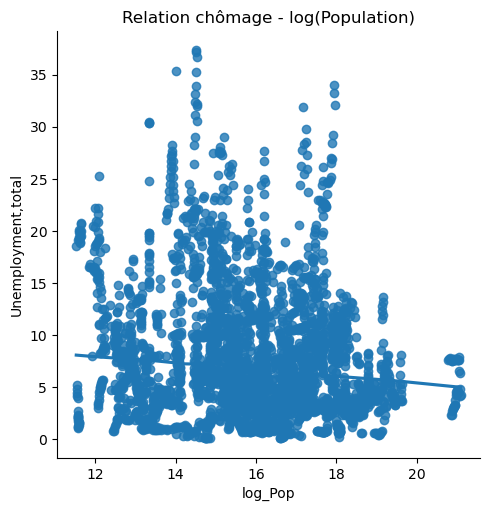

In [293]:
merged['log_Pop'] = np.log(merged['Population, total'] + 1)

sns.lmplot(x='log_Pop', y='Unemployment,total', data=merged, lowess=True)
plt.title("Relation chômage - log(Population)")
plt.show()


In [99]:
merged['School2'] = merged['School enrollment'] ** 2


In [100]:
X = merged[['GDP per Capita', 'School enrollment', 'Population, total']]
y = merged['Unemployment,total']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("R² (modèle combiné):", r2_score(y, y_pred))


R² (modèle combiné): 0.09028620042102697


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("R² (Random Forest):", r2_score(y_test, y_pred))


R² (Random Forest): 0.7048788600278353


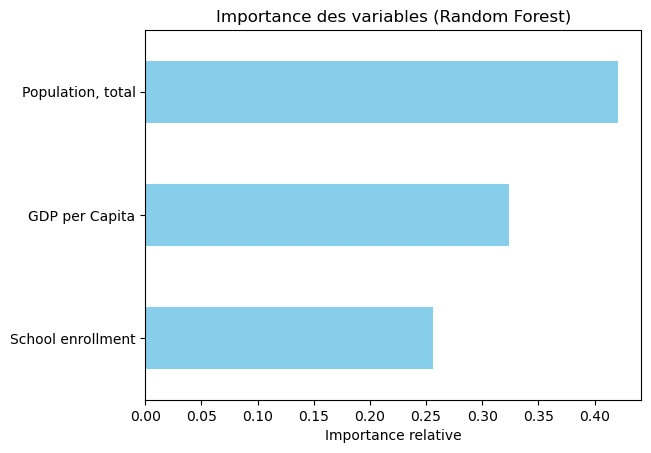

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance relative")
plt.show()


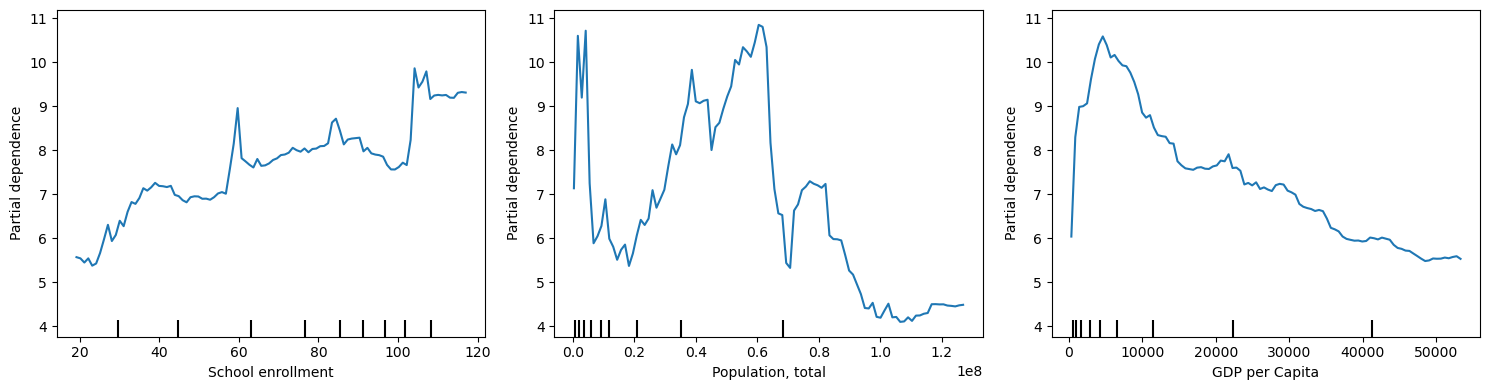

In [103]:
# Import des bibliothèques
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Exemple : ton dataset
# df = pd.read_csv("ton_dataset.csv")
# X = df[['school_enrolment', 'total_population', 'gdp_per_capita']]
# y = df['unemployment_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Partial Dependence Plots
features = ['School enrollment', 'Population, total', 'GDP per Capita']

# Créer une figure et des axes
fig, ax = plt.subplots(1, len(features), figsize=(15, 4))  # 1 ligne, autant de colonnes que de features

# Tracer les PDP
PartialDependenceDisplay.from_estimator(rf, X_train, features, kind='average', ax=ax)

plt.tight_layout()
plt.show()


In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


RMSE: 3.23, MAE: 2.04


In [104]:

merged.to_csv('dataset_nettoye.csv', index=False, encoding='utf-8')
